# **_<div class="alert alert-success"><font color='darkred'> Tutorials: Machine Learning</font></div>_**

### **_<div class="alert alert-success"><font color='darkblue'> @Yonatan Tarazona Coronel</font></div>_**

## 1.0. Neural Network (NN)

El valor es uno de los elementos fundamentales (como por ejemplo una letra o un número) que manipula un programa. Los valores que hemos visto hasta el momento son 2 (el resultado de sumar 1 + 1) y Hola, mundo.

Estos valores son de distintos **tipos**: 2 es un entero y Hola, mundo es una cadena, llamada así porque contiene una "cadena" de letras. Usted (y el intérprete) puede identificar las cadenas porque están encerradas entre comillas.
La sentencia print también funciona con enteros:

In [1]:
import os

os.chdir(r'F:\RepositoriosGitHub\EOpy\eopy')

from mla import *

How to run Neural Network with Python and the EOpy package.

In [15]:
import matplotlib.pyplot as plt
from dbfread import DBF
import rasterio

path_raster = r"I:\DocenteUniversidades\Clases_UNALM\Investigacion\Clasificacion\raster\LT05_198032_2009_Vilca.tif"
img = rasterio.open(path_raster)

path_endmembers = r"I:\DocenteUniversidades\Clases_UNALM\Investigacion\Clasificacion\endmembers\endmembers_2009.dbf"
endmembers = DBF(path_endmembers)

In [20]:
clas = mla(image = img, endm = endmembers)
classi = clas.SVM(training_split = 0.5)

F:\RepositoriosGitHub\EOpy\eopy\mla.py:138: RuntimeWarning: invalid value encountered in true_divide
  ua = np.diag(MC)/np.sum(MC, axis = 1)*100


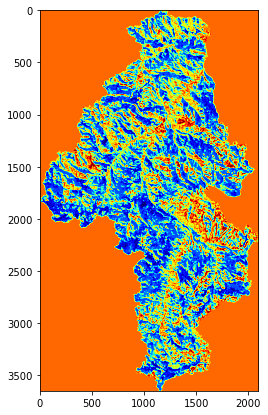

In [7]:
# kmeans
plt.figure(figsize=(7,7))
plt.imshow(classi.get('Classification_Map'), cmap = 'jet')
plt.show()

In [12]:
import writeRaster as wr
wr.writeRaster(arr = classi.get('Classification_Map'), image = classi.get('Image'), filename = 'Coberturas2020_NN')

In [21]:
classi.get('Overall_Accuracy')

0.3375

In [22]:
classi.get('Confusion_Matrix')

,0,1,2,3,4,5,Total,Users_Accuracy,Commission
0,0.0,0.000000,0.0,0.000000,1.000000,0.0,1.0,0.000000,100.000000
1,34.0,31.000000,31.0,3.000000,5.000000,28.0,132.0,23.484848,76.515152
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,NaN,NaN
3,1.0,1.000000,4.0,31.000000,16.000000,5.0,58.0,53.448276,46.551724
4,4.0,4.000000,8.0,5.000000,19.000000,9.0,49.0,38.775510,61.224490
5,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,NaN,NaN
Total,39.0,36.000000,43.0,39.000000,41.000000,42.0,NaN,NaN,NaN
Producer_Accuracy,0.0,86.111111,0.0,79.487179,46.341463,0.0,NaN,NaN,NaN
Omission,100.0,13.888889,100.0,20.512821,53.658537,100.0,NaN,NaN,NaN


## 2.0. K-means

In [ ]:
import matplotlib.pyplot as plt
from dbfread import DBF
import rasterio

path_raster = r"G:\4_RS_Python\Leccion4\Datos\232066\LC08_SUBSET_232066_20190727_STACK.tif"
img = rasterio.open(path_raster)

img.read().shape
clas = rkmeans(image = img, n_clusters = 4)

In [ ]:
# kmeans
plt.figure(figsize=(7,7))
plt.imshow(clas, cmap = 'jet')
plt.show()

In [ ]:
import writeRaster as wr
import os
wr.writeRaster(arr = classi.get('Classification_Map'), 
           image = classi.get('Image'),
           filename = 'img2')